# Exploring the effects of Social Media on Mental Health

## Bring is CSV files

In [1]:
import pandas as pd
import numpy as np

In [136]:

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

# write command for plots to appear in jupyter cells automatically
%matplotlib inline


import matplotlib as mpl
import statsmodels.api as sm

%matplotlib notebook

# Things to show in presentation: 
- Show the trend of rising cell phone/smart phone use over the years
- Show the trend of rising social media use over the years
- Show the data on rising mental health issues (Depression and Anxiety)
- Find correlations if any between rising social media use and mental health 

## Answer the why
- Social media use is increasing and it's important to be aware of the potential negative side effects. It gives us the knowledge to be able to reduce potentially negative effects the more information we have.
- Can potentially reshape the way we use social media

In [3]:
sm_us_df=pd.read_csv('us_social_media_use.csv')

In [4]:
sm_us_df.rename(columns={'response':'Percent of Users'},inplace=True)

In [5]:
sm_us_df.rename(columns={'date':'Date'},inplace=True)

In [6]:
sm_us_df.head()

,Date,Percent of Users
0,3/21/2005,5%
1,12/8/2005,8%
2,8/31/2006,11%
3,5/11/2008,21%
4,8/10/2008,26%


In [7]:
sm_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              31 non-null     object
 1   Percent of Users  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [8]:
sm_us_df.corr()

""


In [9]:
mh_youth_df=pd.read_csv('statistic_id252323_major-depressive-episode-in-the-past-year-among-us-youths-by-gender-2004-2020 (1).csv')

In [10]:
mh_youth_df.head()

,Major depressive episode in the past year among U.S. youths by gender 2004-2020,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Percentage of U.S. youths with a major depress...,NaN,NaN,NaN
1,NaN,Male,Female,NaN
2,2004,5,13.10,in %
3,2005,4.50,13.30,in %
4,2006,4.20,11.80,in %


In [11]:
mh_youth_df.dropna(inplace=True)

In [12]:
mh_youth_df.head()

,Major depressive episode in the past year among U.S. youths by gender 2004-2020,Unnamed: 1,Unnamed: 2,Unnamed: 3
2,2004,5,13.10,in %
3,2005,4.50,13.30,in %
4,2006,4.20,11.80,in %
5,2007,4.60,11.90,in %
6,2008,4.30,12.50,in %


In [13]:
mh_youth_df.rename(columns={'Unnamed: 1':'male','Unnamed: 2':'female'},inplace=True)

In [14]:
mh_youth_df.head()

,Major depressive episode in the past year among U.S. youths by gender 2004-2020,male,female,Unnamed: 3
2,2004,5,13.10,in %
3,2005,4.50,13.30,in %
4,2006,4.20,11.80,in %
5,2007,4.60,11.90,in %
6,2008,4.30,12.50,in %


In [15]:
mh_youth_df.columns.to_list()

['Major depressive episode in the past year among U.S. youths by gender 2004-2020',
 'male',
 'female',
 'Unnamed: 3']

In [16]:
mh_youth_df.rename(columns={'Major depressive episode in the past year among U.S. youths by gender 2004-2020': 'year'},inplace=True)

In [17]:
mh_youth_df=mh_youth_df.iloc[:,:3]

In [18]:
mh_youth_df.dropna(inplace=True)

In [19]:
mh_youth_df.head()

,year,male,female
2,2004,5,13.10
3,2005,4.50,13.30
4,2006,4.20,11.80
5,2007,4.60,11.90
6,2008,4.30,12.50


In [20]:
youth_melted=mh_youth_df.melt(id_vars='year')

In [21]:
ymh_tomerge=mh_youth_df.copy()

In [22]:
ymh_tomerge.rename(columns={'male':'m_youth_depression','female':'f_youth_depression'},inplace=True)

In [23]:
import plotly.express as px

In [121]:
plt.figure(figsize=(12,8))
px.line(youth_melted, x='year', y='value',color='variable')
# plt.title('Depression Episodes in Youth by Percent',fontsize=20)
# plt.xticks(rotation=45)

<Figure size 1200x800 with 0 Axes>

In [25]:
phone_use_df=pd.read_csv('percent of US adults who own a cellphone-smartphone.csv')

In [26]:
phone_use_df

,Date,Cellphone,Smartphone
0,10/27/2002,0.62,NaN
1,11/30/2004,0.65,NaN
2,2/9/2005,0.66,NaN
3,12/31/2005,0.67,NaN
4,3/28/2006,0.66,NaN
...,...,...,...
59,5/3/2016,0.92,0.70
60,11/6/2016,0.95,0.77
61,1/10/2018,0.95,0.77
62,2/7/2019,0.96,0.81


In [27]:
phone_use_df.head()

,Date,Cellphone,Smartphone
0,10/27/2002,0.62,NaN
1,11/30/2004,0.65,NaN
2,2/9/2005,0.66,NaN
3,12/31/2005,0.67,NaN
4,3/28/2006,0.66,NaN


In [28]:
phone_use_df.dropna(inplace=True)

In [29]:
phone_use_df['Date'] = pd.to_datetime(phone_use_df['Date'])

In [30]:
phone_use_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 24 to 63
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        29 non-null     datetime64[ns]
 1   Cellphone   29 non-null     float64       
 2   Smartphone  29 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 928.0 bytes


In [31]:
phone_use_df['Date'] = phone_use_df['Date'].dt.year

In [32]:
phone_use_df

,Date,Cellphone,Smartphone
24,2011,0.83,0.35
28,2012,0.87,0.39
29,2012,0.88,0.45
30,2012,0.88,0.46
31,2012,0.87,0.44
33,2012,0.85,0.45
34,2012,0.88,0.43
38,2012,0.84,0.46
39,2012,0.87,0.45
41,2013,0.89,0.51


In [33]:
phone_use_df=phone_use_df.drop_duplicates(subset='Date',keep='last')

In [34]:
phone_use_df.head()

,Date,Cellphone,Smartphone
24,2011,0.83,0.35
39,2012,0.87,0.45
47,2013,0.92,0.58
54,2014,0.89,0.59
57,2015,0.91,0.69


In [35]:
sns.lineplot(data=phone_use_df, x='Date', y='Smartphone');

In [36]:
phone_use_df.head()

,Date,Cellphone,Smartphone
24,2011,0.83,0.35
39,2012,0.87,0.45
47,2013,0.92,0.58
54,2014,0.89,0.59
57,2015,0.91,0.69


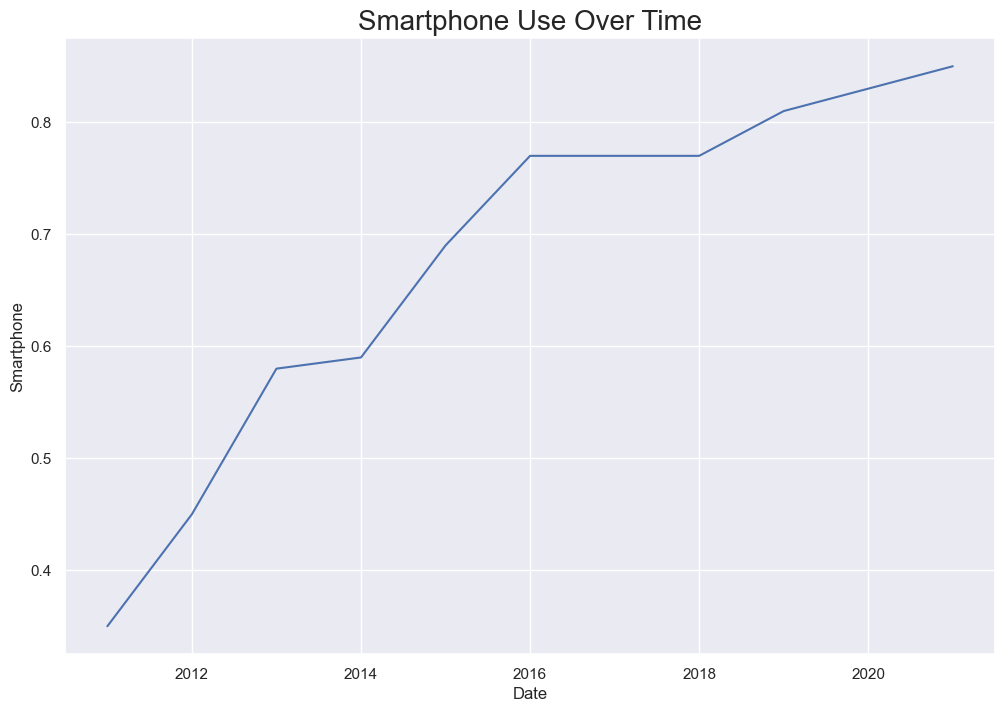

In [127]:
plt.figure(figsize=(12,8))
phonefig=sns.lineplot(data=phone_use_df, x='Date', y='Smartphone')
plt.title('Smartphone Use Over Time',fontsize=20)
plt.xticks(rotation=0);

In [38]:
mental_health_df=pd.read_csv('us_adult_mental_illness_1990-2019.csv')

In [39]:
mental_health_df.head()

,Year,Depression,Anxiety
0,1990,4.07,5.62
1,1991,4.20,5.64
2,1992,4.32,5.66
3,1993,4.44,5.69
4,1994,4.55,5.72


In [40]:
sns.lineplot(data=mental_health_df, x='Year', y='Depression')

<AxesSubplot:title={'center':'Smartphone Use Over Time'}, xlabel='Date', ylabel='Smartphone'>

In [41]:
sns.lineplot(data=mental_health_df, x='Year', y='Anxiety')

<AxesSubplot:title={'center':'Smartphone Use Over Time'}, xlabel='Date', ylabel='Smartphone'>

In [42]:
# import seaborn

import seaborn as sns
# set standard plot type as seaborn plot
sns.set()

# import matplotlib
import matplotlib.pyplot as plt

# write command for plots to appear in jupyter cells automatically
%matplotlib inline

In [43]:
import plotly.express as px

In [44]:
mental_health_df.head()

,Year,Depression,Anxiety
0,1990,4.07,5.62
1,1991,4.20,5.64
2,1992,4.32,5.66
3,1993,4.44,5.69
4,1994,4.55,5.72


In [45]:
phone_use_df

,Date,Cellphone,Smartphone
24,2011,0.83,0.35
39,2012,0.87,0.45
47,2013,0.92,0.58
54,2014,0.89,0.59
57,2015,0.91,0.69
60,2016,0.95,0.77
61,2018,0.95,0.77
62,2019,0.96,0.81
63,2021,0.97,0.85


In [46]:
pu_tomerge=phone_use_df.copy()

In [ ]:
mental_health_df.head()

In [53]:
mh_tomerge=mental_health_df.copy()

In [54]:
mh_combined=mental_health_df.melt(id_vars='Year')

In [128]:
px.line(mh_combined,x='year',y='value',color='variable',title='Depression and Anxiety Over Time')

In [56]:
mh_combined=mh_combined.rename(columns={'Year':'year'})

In [57]:
phone_use_df.head()

,Date,Cellphone,Smartphone
24,2011,0.83,0.35
39,2012,0.87,0.45
47,2013,0.92,0.58
54,2014,0.89,0.59
57,2015,0.91,0.69


In [58]:
sm_copy_df=pd.read_csv('social_media_use_copy.csv')

In [59]:
sm_tomerge=sm_copy_df.copy()

In [60]:
sm_copy_df.tail()

,year,value
9,2015,65.00%
10,2016,69.00%
11,2018,69.00%
12,2019,72.00%
13,2021,72.00%


In [61]:
px.line(sm_copy_df, x='year', y='value', title='Social Media Use Over Time')

In [62]:
sm_combined=sm_copy_df.copy()

In [63]:
sm_combined.insert(1,'variable', 'Percent of Social Media Use')

In [64]:
sm_combined.tail()

,year,variable,value
9,2015,Percent of Social Media Use,65.00%
10,2016,Percent of Social Media Use,69.00%
11,2018,Percent of Social Media Use,69.00%
12,2019,Percent of Social Media Use,72.00%
13,2021,Percent of Social Media Use,72.00%


In [65]:
sm_combined.value=sm_combined['value'].str.replace('.00%','')

C:\Users\cmwill\anaconda3\envs\cap2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [66]:
sm_combined.value=sm_combined.value.astype(int)

In [67]:
sm_combined.head()

,year,variable,value
0,2005,Percent of Social Media Use,8
1,2006,Percent of Social Media Use,11
2,2008,Percent of Social Media Use,26
3,2009,Percent of Social Media Use,42
4,2010,Percent of Social Media Use,47


In [68]:
px.line(sm_combined,x='year',y='value',color='variable')

In [69]:
mh_tomerge.rename(columns={'Year':'year'},inplace=True)

In [70]:
pu_tomerge.rename(columns={'Date':'year'},inplace=True)

In [71]:
merged_master=mh_tomerge.merge(pu_tomerge, on='year')

In [72]:
merged_master=merged_master.merge(sm_tomerge, on='year')

In [73]:
merged_master

,year,Depression,Anxiety,Cellphone,Smartphone,value
0,2011,4.91,6.22,0.83,0.35,50.00%
1,2012,4.87,6.03,0.87,0.45,54.00%
2,2013,4.83,5.84,0.92,0.58,63.00%
3,2014,4.78,5.68,0.89,0.59,62.00%
4,2015,4.75,5.61,0.91,0.69,65.00%
5,2016,4.74,5.60,0.95,0.77,69.00%
6,2018,4.73,5.79,0.95,0.77,69.00%
7,2019,4.73,6.16,0.96,0.81,72.00%


In [74]:
merged_master.rename(columns={'value':'social_media_use'},inplace=True)

In [75]:
merged_master['social_media_use']=merged_master['social_media_use'].str.replace('.00%','')

C:\Users\cmwill\anaconda3\envs\cap2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [76]:
merged_master['social_media_use']=merged_master['social_media_use'].astype(int)

In [77]:
merged_master.drop(columns=['Cellphone'],inplace=True)

In [78]:
merged_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              8 non-null      int64  
 1   Depression        8 non-null      float64
 2   Anxiety           8 non-null      float64
 3   Smartphone        8 non-null      float64
 4   social_media_use  8 non-null      int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 352.0 bytes


In [79]:
ymh_tomerge['year']=ymh_tomerge['year'].astype(int)

In [80]:
merged_master=merged_master.merge(ymh_tomerge,on='year')

In [81]:
merged_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8 non-null      int64  
 1   Depression          8 non-null      float64
 2   Anxiety             8 non-null      float64
 3   Smartphone          8 non-null      float64
 4   social_media_use    8 non-null      int32  
 5   m_youth_depression  8 non-null      object 
 6   f_youth_depression  8 non-null      object 
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 480.0+ bytes


In [82]:
merged_master['m_youth_depression']=merged_master['m_youth_depression'].astype(float)

In [83]:
merged_master['f_youth_depression']=merged_master['f_youth_depression'].astype(float)

In [84]:
merged_master['Smartphone']=merged_master['Smartphone'].apply(lambda x:x*100)

<AxesSubplot:xlabel='f_youth_depression', ylabel='social_media_use'>

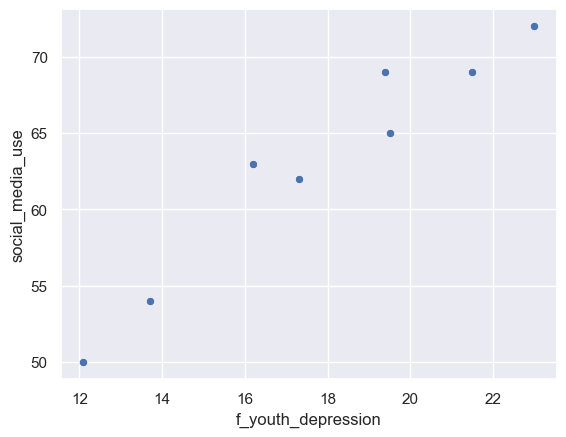

In [118]:
sns.scatterplot(x=merged_master['f_youth_depression'], y=merged_master['social_media_use'])

<AxesSubplot:xlabel='m_youth_depression', ylabel='social_media_use'>

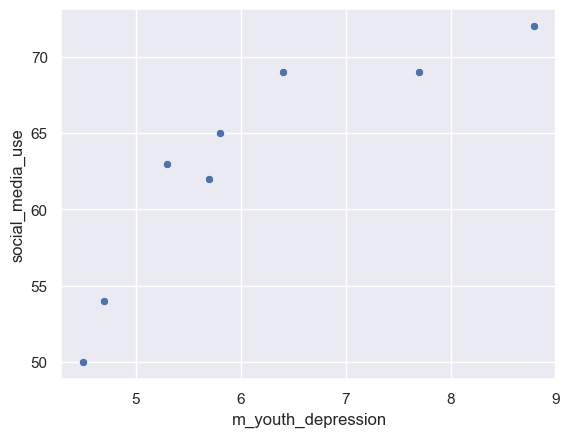

In [129]:
sns.scatterplot(x=merged_master['m_youth_depression'], y=merged_master['social_media_use'])

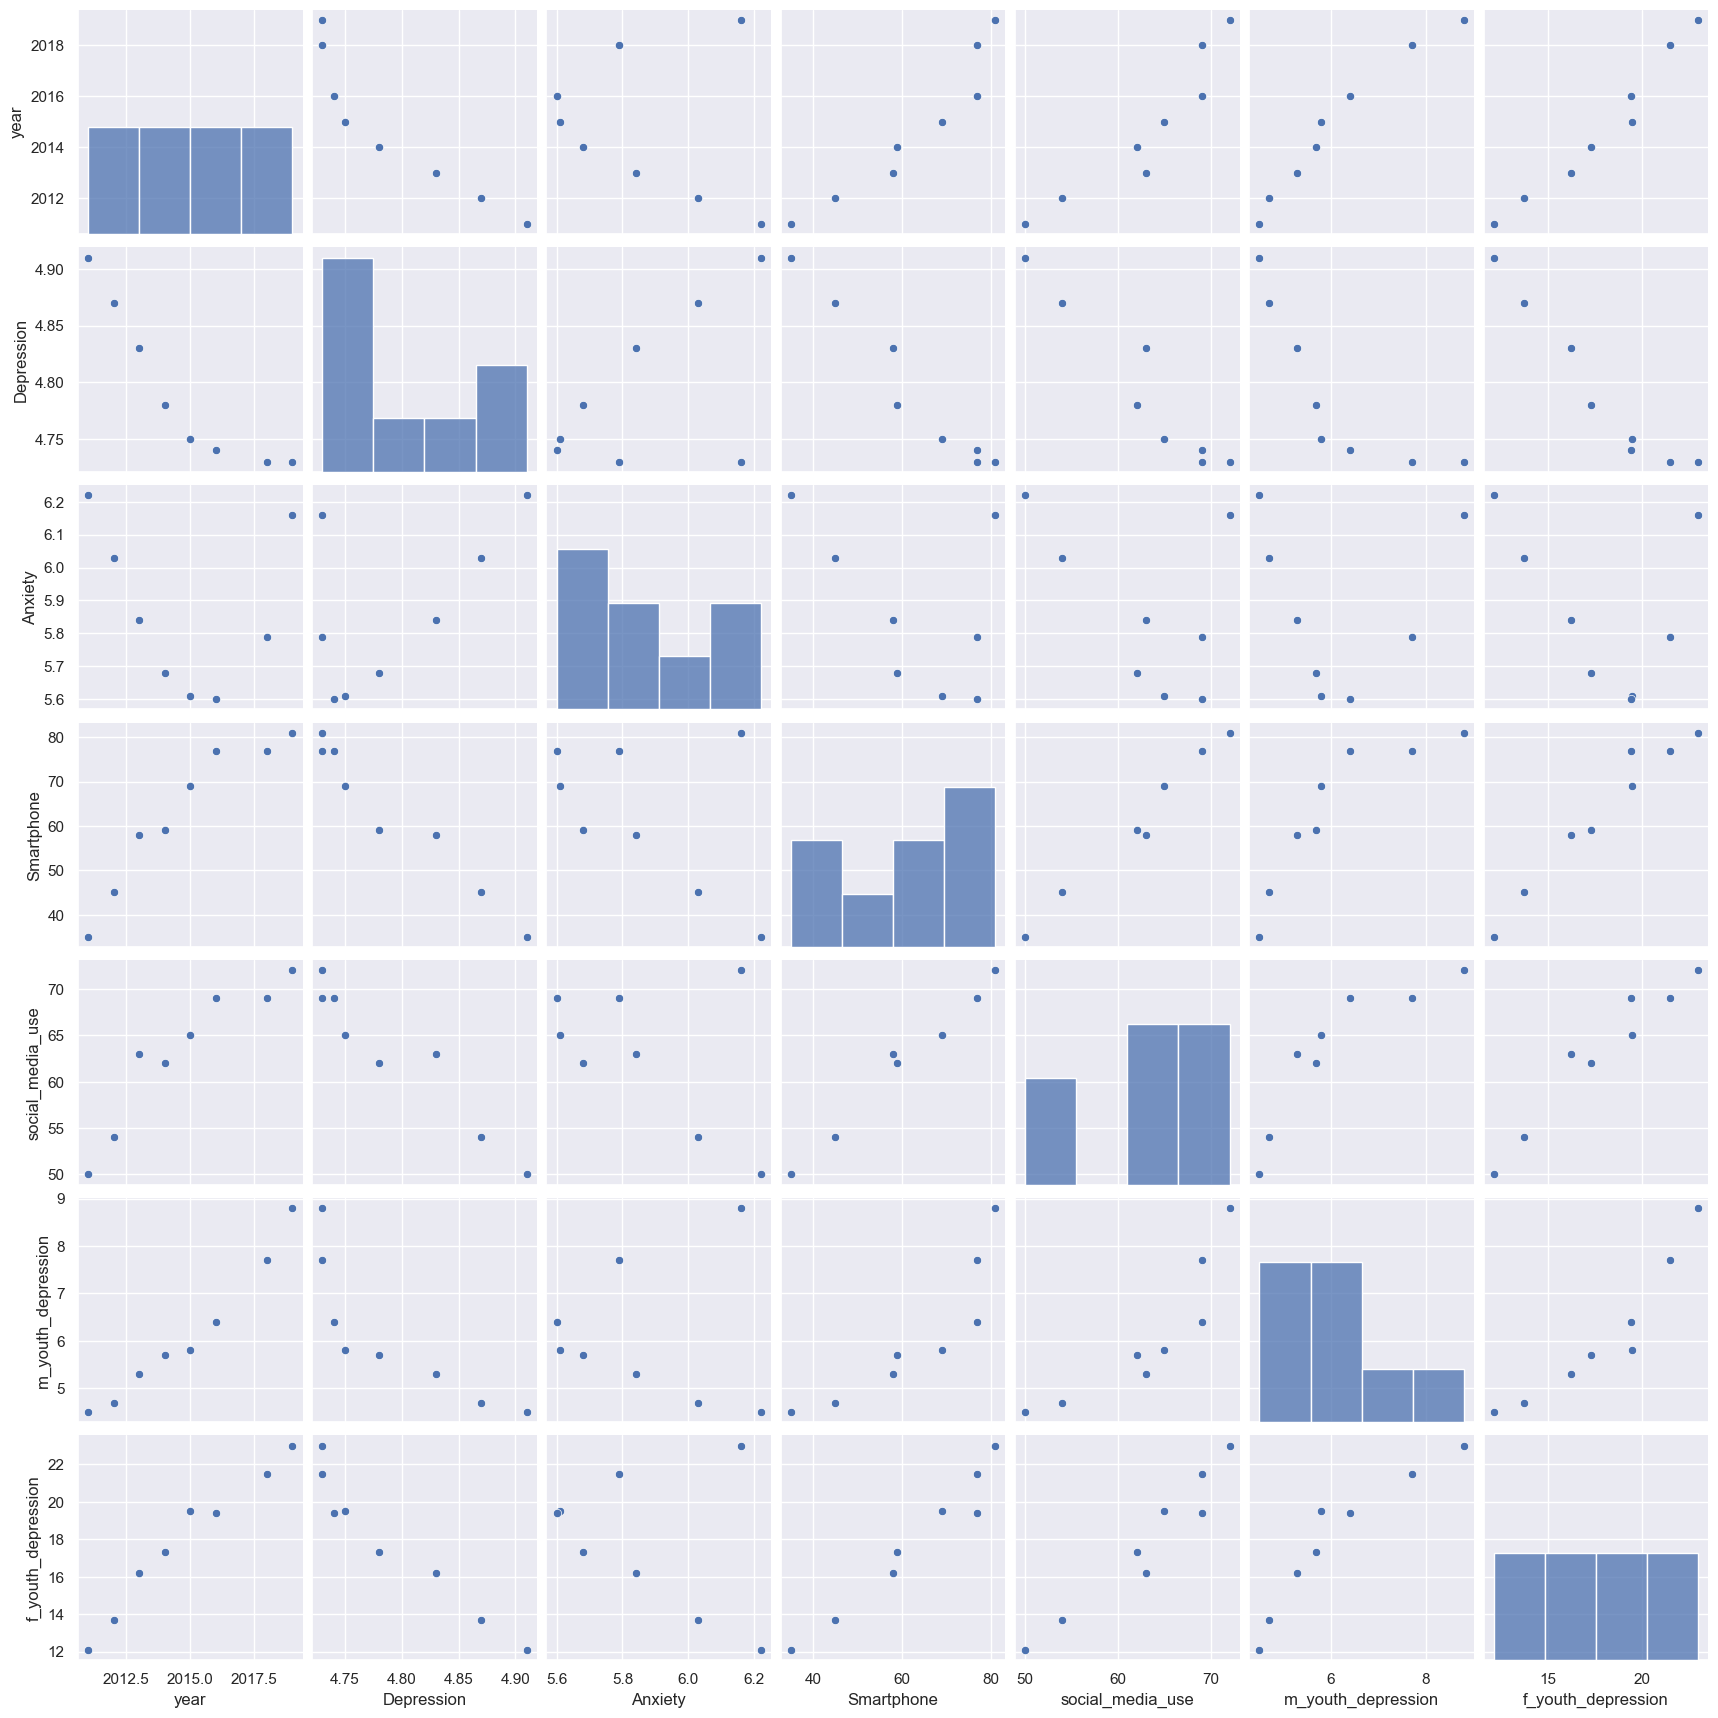

In [131]:
sns.pairplot(merged_master)

In [138]:
# set X 
x1 = merged_master['social_media_use']

# set Y 
y = merged_master['f_youth_depression']

<IPython.core.display.Javascript object>


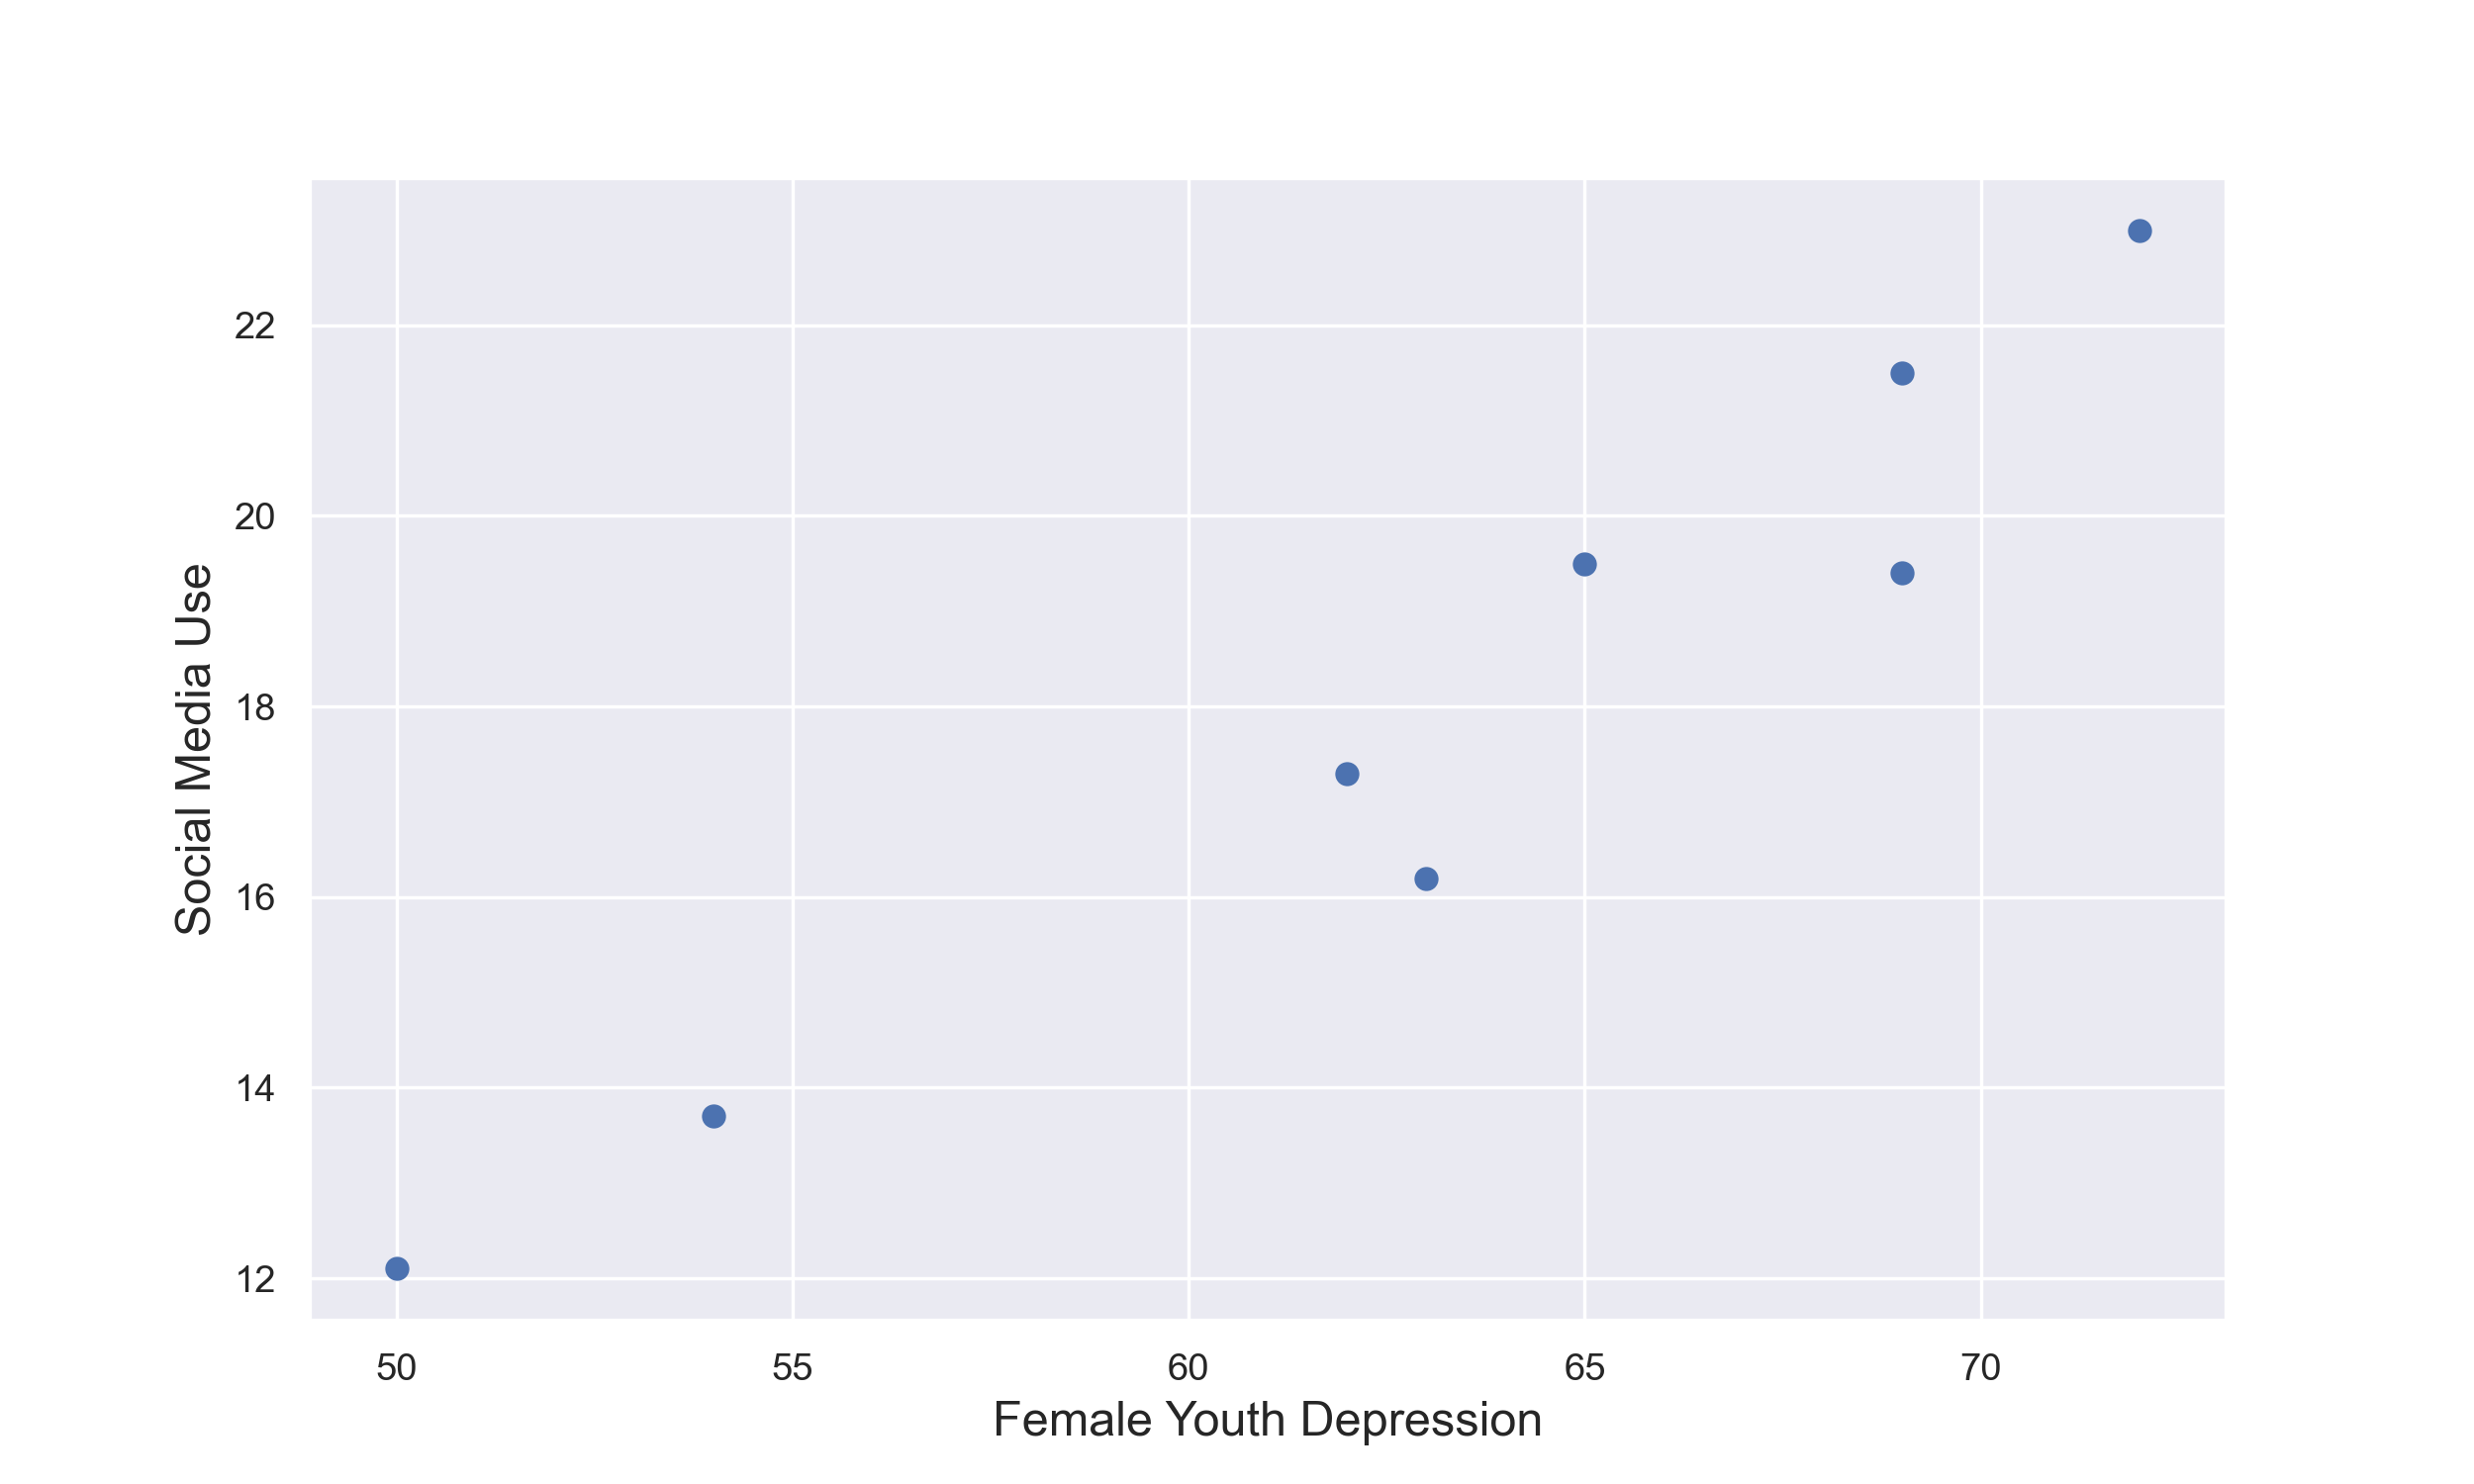

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.xlabel('Female Youth Depression', fontsize=14)
plt.ylabel('Social Media Use', fontsize=14);

In [140]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\cmwill\anaconda3\envs\cap2\lib\site-packages\scipy\stats\stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     f_youth_depression   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     84.60
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           9.31e-05
Time:                        10:34:58   Log-Likelihood:                -10.526
No. Observations:                   8   AIC:                             25.05
Df Residuals:                       6   BIC:                             25.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.0412      3.269     -3.683      0.010     -20.041      -4.042
social_media_use     0.4743      0.052      9.198      0.000       0.348       0.600
==============================================================================
Omnibus:                        1.882   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.143
Skew:                          -0.817   Prob(JB):                        0.565
Kurtosis:                       2.130   Cond. No.                         563.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

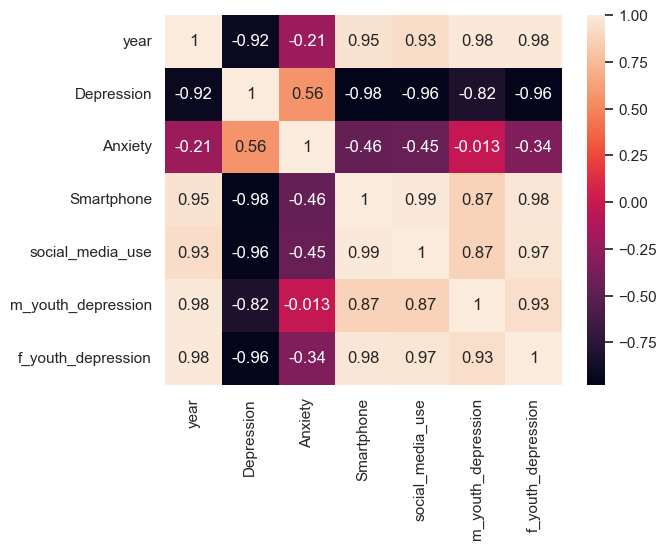

In [85]:
sns.heatmap(merged_master.corr(),annot=True)

In [86]:
merged_master.head()

,year,Depression,Anxiety,Smartphone,social_media_use,m_youth_depression,f_youth_depression
0,2011,4.91,6.22,35.0,50,4.5,12.1
1,2012,4.87,6.03,45.0,54,4.7,13.7
2,2013,4.83,5.84,58.0,63,5.3,16.2
3,2014,4.78,5.68,59.0,62,5.7,17.3
4,2015,4.75,5.61,69.0,65,5.8,19.5


In [87]:
merged_master.to_csv('merged_master.csv',index=False)

In [88]:
melted_master=merged_master.melt(id_vars='year')

In [120]:
merged_master.corr()

,year,Depression,Anxiety,Smartphone,social_media_use,m_youth_depression,f_youth_depression
year,1.000000,-0.916981,-0.205518,0.946200,0.930361,0.977333,0.979969
Depression,-0.916981,1.000000,0.564400,-0.975642,-0.956668,-0.824260,-0.962944
Anxiety,-0.205518,0.564400,1.000000,-0.463180,-0.445970,-0.012516,-0.339207
Smartphone,0.946200,-0.975642,-0.463180,1.000000,0.990430,0.872763,0.975479
social_media_use,0.930361,-0.956668,-0.445970,0.990430,1.000000,0.870668,0.966320
m_youth_depression,0.977333,-0.824260,-0.012516,0.872763,0.870668,1.000000,0.933762
f_youth_depression,0.979969,-0.962944,-0.339207,0.975479,0.966320,0.933762,1.000000


In [123]:
px.line(melted_master,x='year',y='value',color='variable',title='Social Media Use and Mental Health')

In [102]:
melted_mh=melted_master.query('variable != "Smartphone"')

In [103]:
melted_mh=melted_mh.query('variable !="social_media_use"')

In [125]:
px.line(melted_mh,x='year',y='value',color='variable',title='Adult and Youth Depression Percent by Year')

In [113]:
melted_sm=melted_master.query('variable == "Smartphone" | variable == "social_media_use"')

In [124]:
px.line(melted_sm,x='year',y='value',color='variable',title='Smartphone and Social Media Use by year')